In [200]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.patches as patches
from object_loc_helper import get_class_names_map, PlotLosses, plot_sample_class
import os
from shutil import copyfile, rmtree

In [202]:
data_folder = 'dataset/ILSVRC/Data/CLS-LOC'

In [203]:
synset_dict = get_class_names_map()

In [204]:
annotations_dict_train_all = np.load('annotations_train.npy').flat[0]
annotations_dict_val_all = np.load('annotations_val.npy').flat[0]

# Muestra clases de mayor cantidad a menor

In [205]:
ids = []
maxs = []
for i, (class_id, v) in enumerate(annotations_dict_train_all.items()):
    ids.append(class_id)
    maxs.append(len(v.keys()))
    #print(len(v.keys()), class_id, synset_dict[class_id])
sorted_idxs = np.argsort(maxs)[::-1]

for idx in sorted_idxs[:10]:
    print(maxs[idx], ids[idx], synset_dict[ids[idx]])

1300 n02108089 boxer
1268 n09428293 seashore, coast, seacoast, sea-coast
1248 n02113799 standard poodle
1196 n04330267 stove
1192 n04467665 trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
1188 n02106166 Border collie
1162 n02107142 Doberman, Doberman pinscher
1069 n02099601 golden retriever
1054 n02110806 basenji
1040 n02087394 Rhodesian ridgeback


In [206]:
top_100 = np.array(ids)[sorted_idxs][:100]

In [207]:
def get_selected_dict(final_selection, annotations_dict, width = 500, height = 375, depth = 3):
    selection_dict = {}
    for img_class in final_selection:
        selection_dict[img_class] = {}
        for k, v in annotations_dict[img_class].items():
            if len(v['bounding_boxes']) == 1: # and v['width'] == width and v['depth'] == depth and v['height'] == height:
                selection_dict[img_class][k] = v
    return selection_dict

In [209]:
selected_classes = ['n04487081', 'n02108089', 'n01751748', 'n02701002', 'n02279972']
#selected_classes = ['n04487081', 'n02279972']
#selected_classes = ['n02108089', 'n02113799'] # dogs
#selected_classes = top_100

In [210]:
annotations_dict_train = get_selected_dict(selected_classes, annotations_dict_train_all)
annotations_dict_val = get_selected_dict(selected_classes, annotations_dict_val_all)

In [211]:
synset_dict = get_class_names_map()
# Para train
for i, (class_id, v) in enumerate(annotations_dict_train.items()):
    print(len(v.keys()), class_id, synset_dict[class_id])
    
print()
# Para val
for i, (class_id, v) in enumerate(annotations_dict_val.items()):
    print(len(v.keys()), class_id, synset_dict[class_id])

628 n04487081 trolleybus, trolley coach, trackless trolley
1176 n02108089 boxer
485 n01751748 sea snake
525 n02701002 ambulance
644 n02279972 monarch, monarch butterfly, milkweed butterfly, Danaus plexippus

33 n04487081 trolleybus, trolley coach, trackless trolley
41 n02108089 boxer
46 n01751748 sea snake
40 n02701002 ambulance
49 n02279972 monarch, monarch butterfly, milkweed butterfly, Danaus plexippus


# Crea carpetas (Guarda que si existen las borra!!!)

In [214]:
reduced_dataset_folder = 'dataset_5_classes_plus_world/'

In [215]:
if (os.path.isdir(reduced_dataset_folder)):
    rmtree(reduced_dataset_folder)
os.mkdir(reduced_dataset_folder)

np.save(reduced_dataset_folder + '/annotations_train.npy', annotations_dict_train)
np.save(reduced_dataset_folder + '/annotations_val.npy', annotations_dict_val)

n02279972 monarch, monarch butterfly, milkweed butterfly, Danaus plexippus
Cantidad de imagenes de esta clase: 644


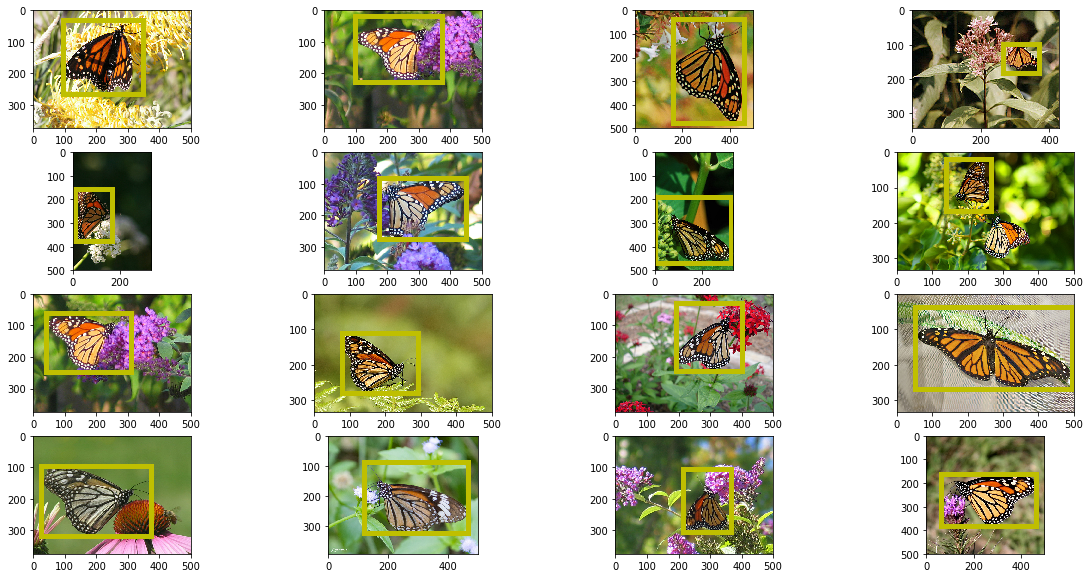

In [219]:
plot_sample_class(4, annotations_dict_train, synset_dict, data_folder)

# Armo carpentas con clases

In [220]:
images_folder = reduced_dataset_folder + '/images'
train_folder = reduced_dataset_folder + '/images/train'
val_folder = reduced_dataset_folder + '/images/val'

In [221]:
# Creo carpetas de train y val
if (os.path.isdir(images_folder)):
    rmtree(images_folder)
os.mkdir(images_folder)
if (os.path.isdir(train_folder)):
    rmtree(train_folder)
os.mkdir(train_folder)
if (os.path.isdir(val_folder)):
    rmtree(val_folder)
os.mkdir(val_folder)

In [222]:
# Create classes folders
for class_id in annotations_dict_train.keys():
    folder_to_create_train = train_folder+'/'+class_id
    folder_to_create_val = val_folder+'/'+class_id
    if (os.path.isdir(folder_to_create_train)):
        rmtree(folder_to_create_train)
    if (os.path.isdir(folder_to_create_val)):
        rmtree(folder_to_create_val)
    os.mkdir(folder_to_create_train)
    os.mkdir(folder_to_create_val)

In [223]:
# Para train
class_list = []
images_file_list = []
for i, (class_id, v) in enumerate(annotations_dict_train.items()):
    for j, image_file_id in enumerate(v):
        image_file = data_folder+'/train/'+class_id+'/' +image_file_id+'.JPEG'
        copyfile(image_file, train_folder+'/'+class_id+'/' +image_file_id+'.JPEG')
    print('class index:',i, 'Total:', j+1)

class index: 0 Total: 628
class index: 1 Total: 1176
class index: 2 Total: 485
class index: 3 Total: 525
class index: 4 Total: 644


In [224]:
# Para val
class_list = []
images_file_list = []
for i, (class_id, v) in enumerate(annotations_dict_val.items()):
    for j, image_file_id in enumerate(v):
        image_file = data_folder+'/val/' +image_file_id+'.JPEG'
        copyfile(image_file, val_folder+'/'+class_id+'/' +image_file_id+'.JPEG')
    print('class index:',i, 'Total:', j)

class index: 0 Total: 32
class index: 1 Total: 40
class index: 2 Total: 45
class index: 3 Total: 39
class index: 4 Total: 48


# Random World Images

In [249]:
world_folder_to_create_train = train_folder+'/world'
world_folder_to_create_val = val_folder+'/world'
if (os.path.isdir(world_folder_to_create_train)):
    rmtree(world_folder_to_create_train)
if (os.path.isdir(world_folder_to_create_val)):
    rmtree(world_folder_to_create_val)
os.mkdir(world_folder_to_create_train)
os.mkdir(world_folder_to_create_val)

In [250]:
def get_random_image(ids, annotations_dict, train=True):
    n_clases = len(ids)
    random_class = ids[np.random.randint(n_clases)]
    images_ids = list(annotations_dict[random_class].keys())
    images_in_class = len(images_ids)
    image_id = images_ids[np.random.randint(images_in_class)]
    if train:
        image_file = data_folder+'/train/'+random_class+'/' +image_id+'.JPEG'
    else:
        image_file = data_folder+'/val/' +image_id+'.JPEG'
    return image_file


In [251]:
N_random = 1100
random_images_list = []
for i in range(N_random):
    random_images_list.append(get_random_image(list(set(ids) - set(selected_classes)), annotations_dict_train_all, train=True))

In [252]:
random_train = random_images_list[:1000]
random_val = random_images_list[1000:]

In [253]:
for image_file in random_train:
    copyfile(image_file, world_folder_to_create_train + '/' + image_file.split('/')[-1])

In [248]:
for image_file in random_val:
    copyfile(image_file, world_folder_to_create_val + '/' + image_file.split('/')[-1])